In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import svm, datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

2023-02-02 10:10:22.275925: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-02 10:10:22.540821: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-02 10:10:22.540855: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-02 10:10:23.389698: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# Our first neural net based on logreg example

In this notebook we will apply logistic regression to a linearly separable dataset of two classes.

The notebook will help us to better understand logistic regression and why it can be perceived as a baby neural net.

The most important part of this notebook is to identify the ingredientes of logistic regression as well as to understand the mechanism logistic regression is using to classify the points.

## 1. Artificially create a linearly separable dataset with two classes.

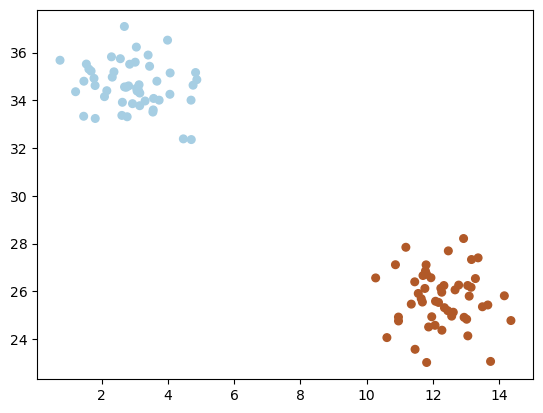

In [2]:
# We randomly generate datapoints from two different gaussians.
X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 50))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)


## 2. Create the Logistic Regression Model Structure.

EXERCISE SYNOPSIS
==================
Following the last notebook LogisticRegression-Fundamentals, create, using tf.keras.Sequential, a Neural Net to solve the same problem.

 

The neural net must have an Input layer of two units (same that for the logistic regressor) a dense hidden layer of 4 units, and a dense output layer of 2 units. The 2 output units represents the probability to belong to the 2 classes of the problem. Use softmax as the classifier in the last layer and therefore crossentropy (no binary crossentropy)

ORIGINAL LOGREG EXERCISE
=========================

We will use keras to create our Logistic Regression Model. Specifically we will use the class Sequential, where we can create a model layer by layer -- this would be specially interesting where working with neural nets.

There are different types of layers. We will use two in particular, the layer Input (just for holding our input vectors) and the Layer "Dense". A "Dense layer" indicates that the units of the layer are fully connected with the input layer units https://keras.io/api/layers/core_layers/dense/

For further information please have a look into the keras documentation

https://keras.io/api/layers/

In [3]:
#Mapping function
my_first_neural_net = tf.keras.Sequential([
    layers.Input(shape=(2, ), name="input"),                                         
    layers.Dense(units=4, activation="relu", name="dense"),
    layers.Dense(units=2, activation='softmax', name="output")
])

2023-02-02 10:10:24.887733: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-02 10:10:24.888157: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-02 10:10:24.888265: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-02 10:10:24.888335: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-02 10:10:24.888405: W tensorflow/c

In [4]:
# we can use the summary function to inspect the layers of our model 
my_first_neural_net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 output (Dense)              (None, 2)                 10        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


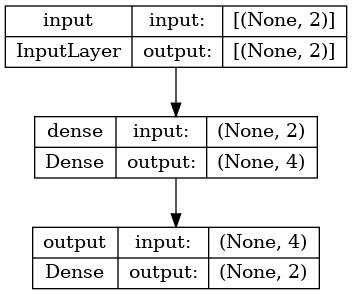

In [5]:
tf.keras.utils.plot_model(my_first_neural_net, show_layer_names=True, show_shapes=True)

## 3. Compiling the model

Now that we have an structure we need to complete the model. So far, we have how the inputs and outputs will be and how they relate (through the mapping function/structure that we create).

Now we need the cost function to measure how well or bad we are doing the things and the learning procedure. We do this through the 'compile' function.

Also we include the kind of metric we want to assess. In this case "accuracy"


In [7]:
#defining the loss function
my_first_neural_net.compile(optimizer='sgd', 
                            loss='sparse_categorical_crossentropy', 
                            metrics=['accuracy'])

## 4. Training the model

The infamous fit! This basically will run our learning procedure (which it is iterative) over our training dataset, and evaluate over the validation one. 

In [8]:
#will begin the optimization procedure

history = my_first_neural_net.fit(X, y, epochs=100, verbose=0, validation_split = 0.2)

## 5. See how it was the run...

In [9]:
#live methods of visualizing the run available in the chapter 4 of Manning book
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,21.746540,0.550,13.254049,0.3,0
1,6.303281,0.550,3.858057,0.3,1
2,1.981256,0.550,1.623925,0.3,2
3,0.991974,0.550,0.761162,0.3,3
4,0.597355,0.625,0.611565,0.7,4
...,...,...,...,...,...
95,0.162656,1.000,0.247900,1.0,95
96,0.161456,1.000,0.245998,1.0,96
97,0.160253,1.000,0.244928,1.0,97
98,0.159468,1.000,0.242990,1.0,98


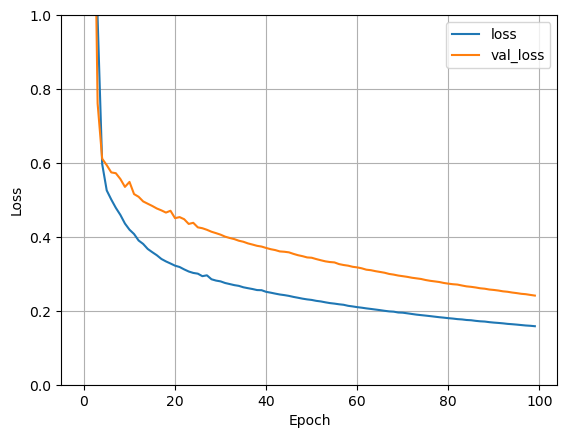

In [10]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
plot_loss(history)

## 6. Dig a litte bit further into the model and plot the boundary

In [12]:
my_first_neural_net.trainable_variables


[<tf.Variable 'dense/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.5833575 ,  0.41099536, -0.26108265,  0.43280077],
        [ 0.23451175, -0.24409291, -0.6923301 , -0.9402313 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([-0.01054996, -0.04534057,  0.        ,  0.        ], dtype=float32)>,
 <tf.Variable 'output/kernel:0' shape=(4, 2) dtype=float32, numpy=
 array([[ 0.85379696, -0.04444214],
        [ 0.22594611, -0.13755764],
        [ 0.94299984, -0.25549483],
        [ 0.09992218,  0.9606221 ]], dtype=float32)>,
 <tf.Variable 'output/bias:0' shape=(2,) dtype=float32, numpy=array([-0.4563754,  0.4563754], dtype=float32)>]

In [13]:
w1 = my_first_neural_net.trainable_variables[0][0]
print(w1)
w2 = my_first_neural_net.trainable_variables[0][1]
print(w2)
b = my_first_neural_net.trainable_variables[1][0]
print(b)

tf.Tensor([-0.5833575   0.41099536 -0.26108265  0.43280077], shape=(4,), dtype=float32)
tf.Tensor([ 0.23451175 -0.24409291 -0.6923301  -0.9402313 ], shape=(4,), dtype=float32)
tf.Tensor(-0.010549963, shape=(), dtype=float32)


68943/68943 [==============================] - 40s 585us/step


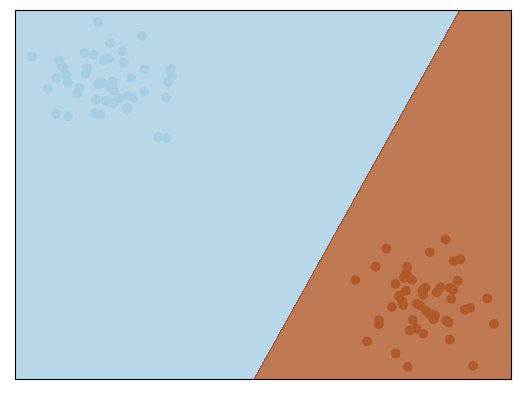

In [16]:
#plot the boundaries with my_first_neural_net
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = my_first_neural_net.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

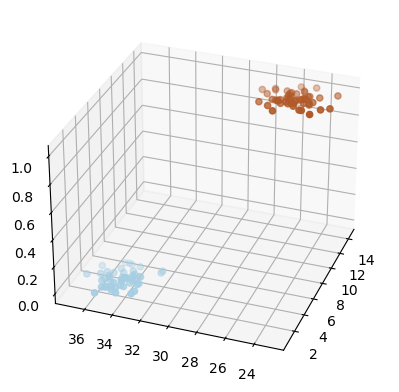

In [17]:
#plot it in 3d
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap=plt.cm.Paired)
ax.view_init(30, 200)
plt.show()

In [24]:
#take a random datapoint of class 1 from my_first_neural_net and see what it predicts
x = np.array([[30, 30]])
y = my_first_neural_net.predict(x)
print(y)
y = np.argmax(y, axis=1)
print(y)

1/1 [==============================] - 0s 21ms/step
[[0.7090671  0.29093283]]
[0]
